### Numpy polyfit function 
First dataset
In the previous courses, we mainly worked with Pandas DataFrame objects. This was particularly convenient since each column in our data can have a different data type.

However, when mapping some input values to an output, machine learning algorithms usually expect values from the data to have a uniform data type. Hence, they mainly work with Numpy arrays. So, before fitting our model, the first step of our ML pipeline is to prepare the x and y Numpy array variables

In [38]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly

data_df = pd.read_csv("c3_poly_data-1.csv")
data_df.head()

,x,y
0,0.375,-0.027
1,0.951,0.378
2,0.732,0.174
3,0.599,0.049
4,0.156,-0.423


In [5]:
x = data_df.x.values
y = data_df.y.values

print("Type of x and y:", type(x), type(y))

Type of x and y: <class 'numpy.ndarray'> <class 'numpy.ndarray'>


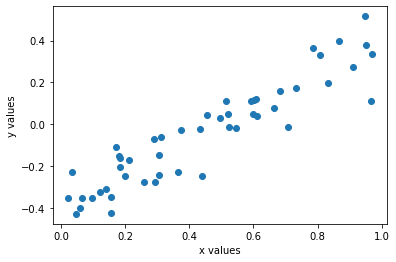

In [6]:
# Plot data points
plt.scatter(x, y)
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()


As you can see, the data points follow a linear trend. Hence, it makes sense to fit a line and set the degree of the Numpy polyfit() function to one.

In [7]:
coefs = poly.polyfit(x, y, deg=1)
print("Coefficients:", coefs)

Coefficients: [-0.3904125   0.77788056]


In [8]:
# Extract individual coefficients
c_0, c_1 = coefs

print("c_0 (intercept):", c_0)
print("c_1 (slope)    :", c_1)

c_0 (intercept): -0.3904124988780681
c_1 (slope)    : 0.7778805590197081


In our simple scenario, we have a single input x, and a single output y. Thus we can actually visualize our model by plotting some predictions. In this case, the equation of our model is just the equation of a straight line since deg=1.

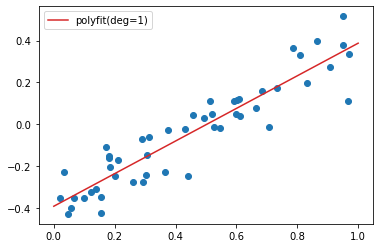

In [10]:
# Generate a hundred values between 0 and 1
x_values = np.linspace(0, 1, num=100)  # ~ [0, 0.01, 0.02, ... 0.98, 0.99, 1]

# Compute the associate y values
y_values = c_0 + c_1 * x_values

# Plot the line
plt.scatter(x, y)  # Plot the actual data
plt.plot(x_values, y_values, c="C3", label="polyfit(deg=1)")  # Plot the prediction line
plt.legend()
plt.show()

#### Second dataset
We are now going to work on the second set of points which has a more complex relationship between the x/y variables. Again, let’s use Pandas to read the .csv file and load the variables into two Numpy arrays.

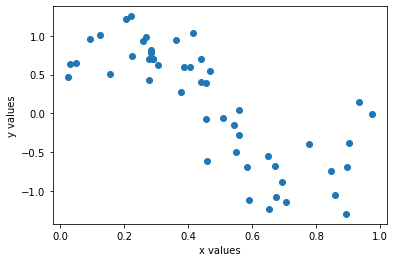

In [13]:
# Load second set of points
data_df = pd.read_csv("c3_poly_data-2.csv")
x2 = data_df.x.values
y2 = data_df.y.values

# Plot data points
plt.scatter(x2, y2)
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

In [12]:
# Fit a line
coefs2 = poly.polyfit(x2, y2, deg=1)
print('Coefficients:', coefs2)

# Generate a hundred x values between 0 and 1
x_values2 = np.linspace(0, 1, num=100)

# Compute the associate y values
c_0, c_1 = coefs2
y_values2 = c_0 + c_1*x_values2

Coefficients: [ 1.17807746 -2.25363975]


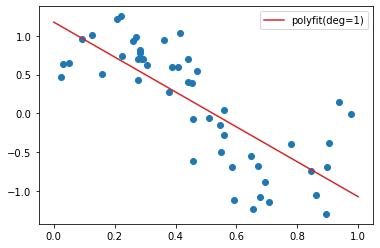

In [14]:
# Plot the line
plt.scatter(x2, y2)  # Plot the actual data
plt.plot(x_values2, y_values2, c="C3", label="polyfit(deg=1)")  # Plot the prediction line
plt.legend()
plt.show()

Our line captures the main trend but is too rigid to model the relationship between the x and y values well. Let’s increase the degree and fit a polynomial of degree 3.

In [15]:
# Fit a polynomial of degree 3
coefs2 = poly.polyfit(x2, y2, deg=3)
print("Coefficients:", coefs2)

Coefficients: [  0.24324604   8.92987847 -29.43676159  20.52793415]


In [16]:
c_0, c_1, c_2, c_3 = coefs2
y_values2 = c_0 + c_1 * x_values2 + c_2 * (x_values2 ** 2) + c_3 * (x_values2 ** 3)

As you can see, the equation is a bit longer, and it can get complicated to compute the y values manually. For this reason, Numpy provides a polyval() function that takes the x values and the array of coefficients.

In [17]:
# Predict y values with new coefs
y_values2 = poly.polyval(x_values2, coefs2)

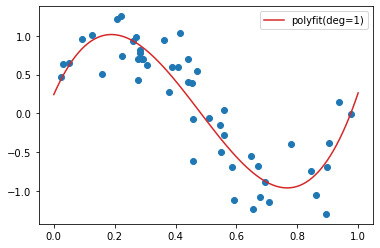

In [18]:
# Plot the line
plt.scatter(x2, y2)  # Plot the actual data
plt.plot(x_values2, y_values2, c="C3", label="polyfit(deg=1)")  # Plot the prediction line
plt.legend()
plt.show()

As you can see, a polynomial of degree 3 is better at capturing the trend in this dataset than a line. Try to increase the degree to 4, 5 or even more! You should see that the curve starts fitting more than just the trend. It gets influenced by the noise in the data. This phenomenon is known as overfitting, but we will learn more about it later in this course.

#### Third dataset

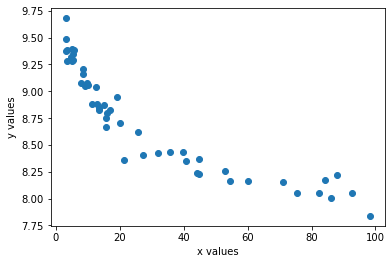

In [22]:
# Load second set of points
data_df = pd.read_csv("c3_poly_data-3.csv")
x3 = data_df.x.values
y3 = data_df.y.values

# Plot data points
plt.scatter(x3, y3)
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

Coefficients: [ 9.44842372e+00 -3.86932934e-02  2.61168850e-04]


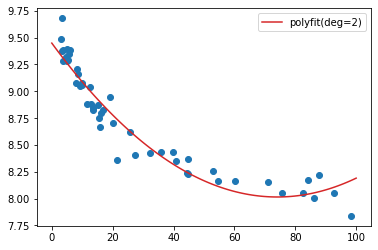

In [26]:
# Fit a polynomial of degree 3
coefs3 = poly.polyfit(x3, y3, deg=2)
print("Coefficients:", coefs3)

# Generate a hundred x values between 0 and 1
x_values3 = np.linspace(0, 100, num=100)

# Predict y values with new coefs
y_values3 = poly.polyval(x_values3, coefs3)

# Plot the line
plt.scatter(x3, y3)  # Plot the actual data
plt.plot(x_values3, y_values3, c="C3", label="polyfit(deg=2)")  # Plot the prediction line
plt.legend()
plt.show()

In [29]:
# Defining a function for fitting
def fit(x, y, deg, xlabel, ylabel, legend):
    # Fit a polynomial
    coefs = poly.polyfit(x, y, deg=deg)

    # Generate a hundred values between min(x) and max(x)
    x_values = np.linspace(min(x), max(x), num=100)

    # Predict y values
    y_values = poly.polyval(x_values, coefs)

    # Plot curve
    plt.scatter(x, y)
    plt.plot(x_values, y_values, c="C3", label=legend)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

#### Logarithmic scale

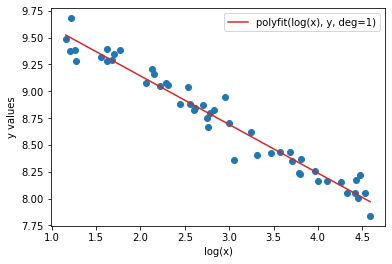

In [32]:
fit(np.log(x3), y3, 1, "log(x)", "y values", "polyfit(log(x), y, deg=1)")


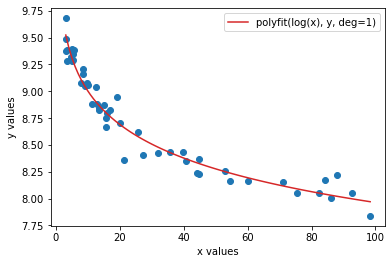

In [37]:
# Fit a polynomial
coefs = np.polyfit(np.log(x3), y3, deg=1)

# Generate a hundred values between min(x) and max(x)
x_values = np.linspace((x3).min(), (x3).max(), num=100)

# Predict y values
y_values = np.polyval(coefs, np.log(x_values))

# Plot curve
plt.scatter(x3, y3)
plt.plot(x_values, y_values, c='C3', label='polyfit(log(x), y, deg=1)')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.show()